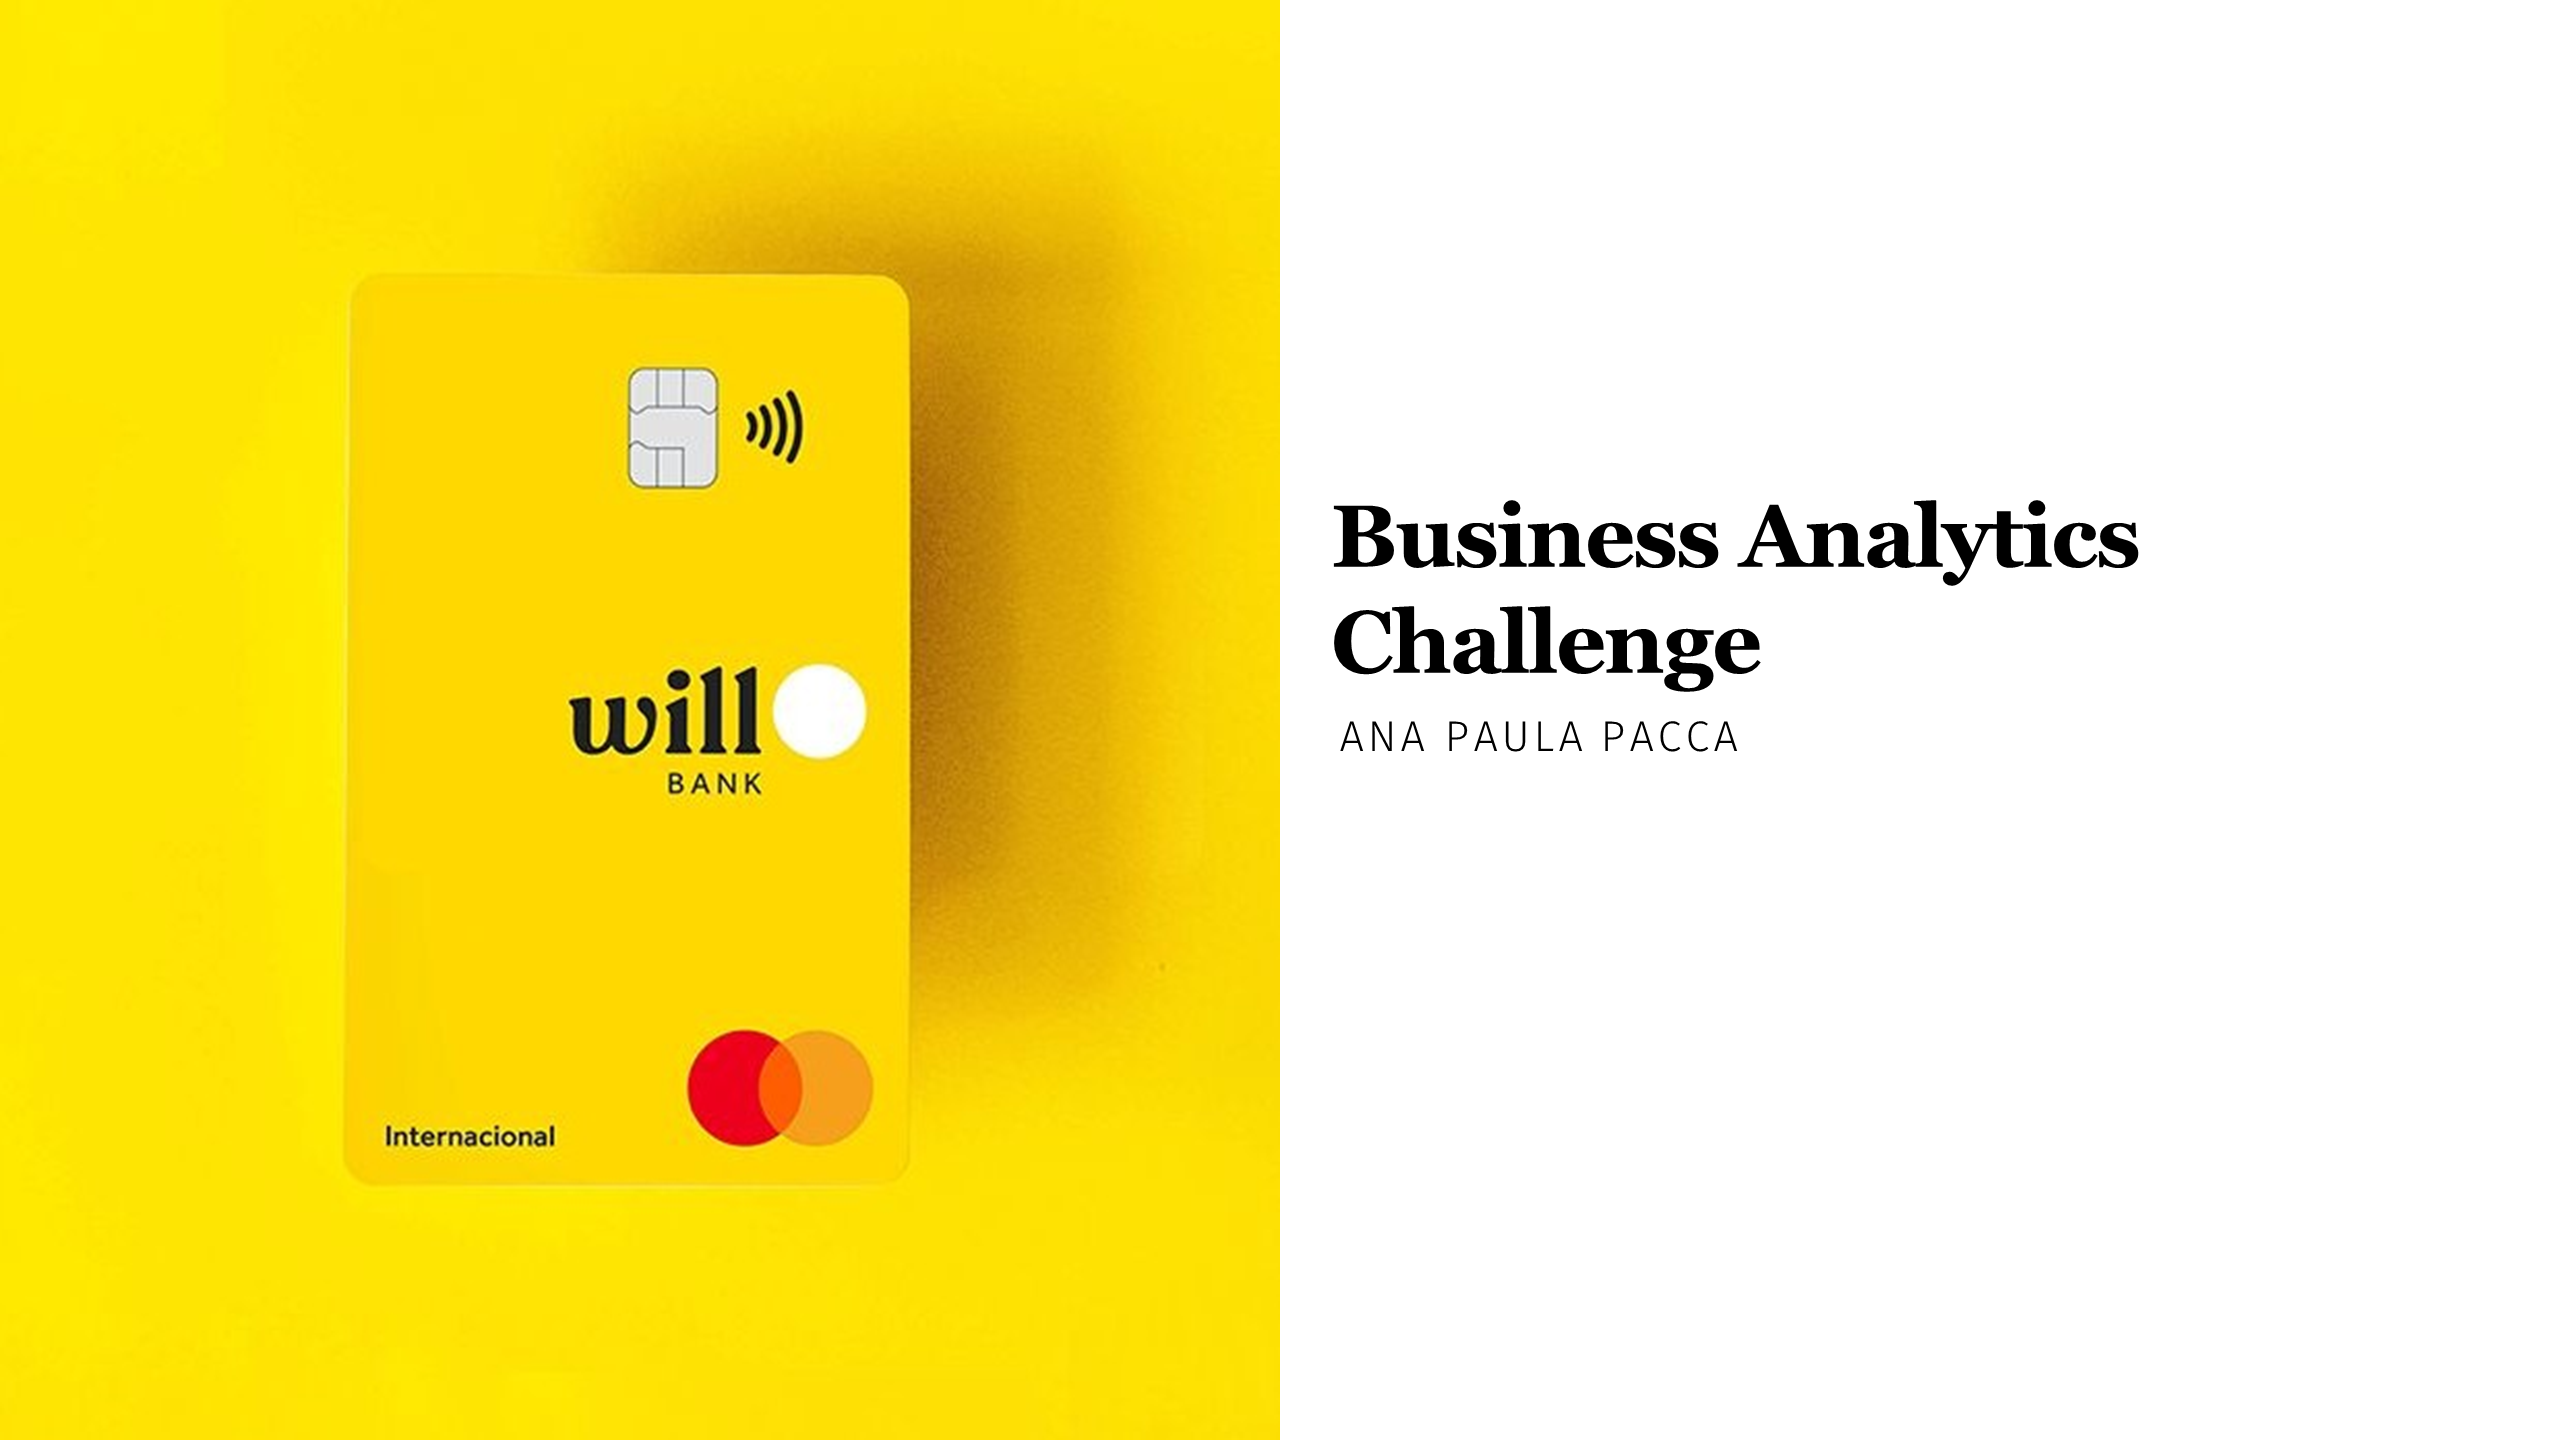

## Importar dataset

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/anapaccasilva/WillBank_case/main/Case_Bank_Customer.csv'
customers = pd.read_csv(url, sep= ",", index_col=0 )

# **Modelos de Classificação**

### Preparação dos dados

Eliminar outliers de idade

In [2]:
customers2 = customers[customers['age'] < 100] 

Análise da variável dependente (Churn)

**Barplot**

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [45]:
# função para criação do gráfico de barras
def barplot_count(dataframe, variavel, titulo):
  df = dataframe.groupby(variavel)[variavel].count().reset_index(name='count')
  total = df['count'].sum()
  df['percent'] = df['count'] / total * 100  # Calcula a quantidade relativa em porcentagem
  df = df.sort_values('count', ascending=True)  # Ordena o DataFrame pelo count em ordem crescente
  
  x = df[variavel]
  y = df['count']
  plt.figure(figsize=(10,8))

  #construir gráfico de barras usando cores aleatórias a cada execução
  cor = ['#FFD900', '#414141', '#CACACA', '#FFEA69', '#7B7B7B']
  colors = cor[random.randint(0,1)]  #color aleatoria
  bars = plt.bar(x,y, color = cor[:len(x)])

  #adiciona titulo ao gráfico, aos eixos e salva a figura
  plt.title(titulo)
  plt.xlabel(variavel)
  plt.ylabel('quantidade')
  plt.savefig(titulo + '.png', bbox_inches="tight")

  #função para adicionar rótulos às colunas
  def addlabels(x, y):
        for i, j in zip(x, y):
            label = f'{j}  ({df.loc[df[variavel] == i, "percent"].iloc[0]:.2f}%)'
            plt.text(i, j, label, ha='center', va='bottom')

  addlabels(x, y)
  return plt.show()

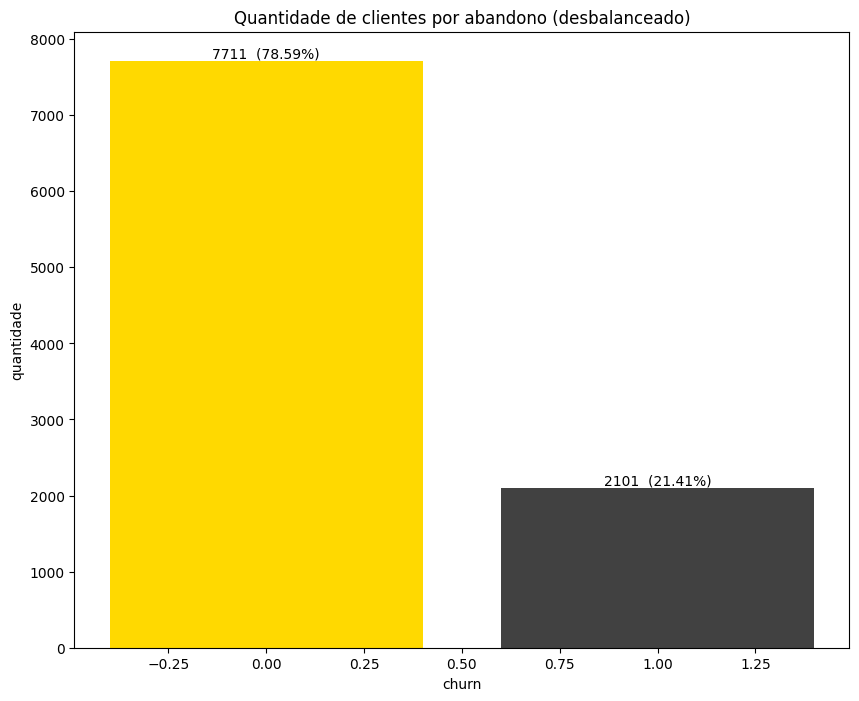

In [31]:
barplot_count(customers2, 'churn', 'Quantidade de clientes por abandono (desbalanceado)')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Como observado no gráfico anterior, a variável dependente - Churn - está desbalanceada, ou seja uma classe é representada por um número significativamente menor de ocorrências em comparação com a outra. Uma variável dependente desbalanceada é um problema nos modelos de classificação porque pode levar a viés de predição, desempenho desigual entre as classes e métricas de avaliação inadequadas, resultando em dificuldades de generalização e classificação das classes minoritárias. Por essa razão, optou-se por gerar dados artificiais para balancear a amostra e atestar a utilidade dos modelos de classificação no caso em questão.*

In [3]:
import pandas as pd
from sklearn.utils import resample

Balancear os dados de churn usando técnica undersamppling (redução da amostra)

In [32]:
# Divide o dataframe
df_majority = customers2[customers2.churn==0]
df_minority = customers2[customers2.churn==1]

# define o número de observações de acordo com a amostra minoritária
df_majority_undersampled = resample(df_majority,
                                    replace=False, 
                                    n_samples=len(df_minority), 
                                    random_state=42)

# Une os dois dataframes
customers_balanceado = pd.concat([df_majority_undersampled, df_minority])

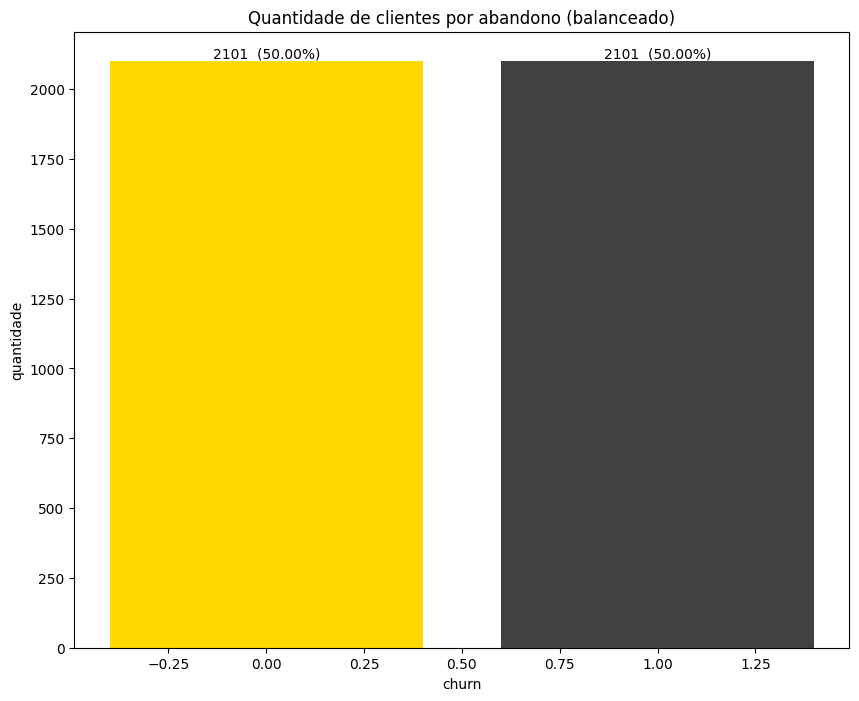

In [33]:
barplot_count(customers_balanceado, 'churn', 'Quantidade de clientes por abandono (balanceado)')

Separa os dados entre treinamento e teste, em uma proporção de 80/20

In [8]:
from sklearn.model_selection import train_test_split

X = customers_balanceado.drop(['churn'], axis=1)
y =customers_balanceado['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 123)

Transforma as variáveis categóricas em variáveis numéricas

In [ ]:
!pip install category-encoders
import category_encoders as ce

In [34]:
encoder = ce.OrdinalEncoder(cols=['country', 'gender'])

In [35]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

## Modelo de clasificación: Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

modelo_rfc = RandomForestClassifier(n_estimators = 10,
                                    random_state=123)
modelo_rfc.fit(X_train, y_train)
y_pred = modelo_rfc.predict(X_test)
acc_randomforest = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo usando 10 árvores: {acc_randomforest}')

Acurácia do modelo usando 10 árvores: 0.7455410225921522


In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Matriz de confusão

              precision    recall  f1-score   support

           0     0.7249    0.7905    0.7563       420
           1     0.7702    0.7007    0.7338       421

    accuracy                         0.7455       841
   macro avg     0.7476    0.7456    0.7450       841
weighted avg     0.7476    0.7455    0.7450       841



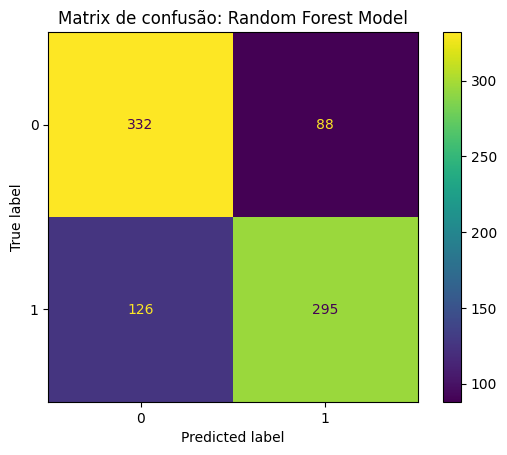

In [14]:
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matrix de confusão: Random Forest Model')
plt.show()


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *O modelo de classificação construído segundo o algorítimo Random Forest apresentou acurácia de 74,55%, utilizando todas as variáveis da amostra. O modelo apresentou uma precisão de 72,49% na predição de clientes que não abandonaram e 77,02% na predição de clientes que abandonaram.*

## Modelo de classificação: Regressão Logística

In [15]:
from sklearn.linear_model import LogisticRegression
modelo_logistic = LogisticRegression(solver='lbfgs', max_iter=1000)

Modelo e acurácia

In [16]:
clf2 = modelo_logistic.fit(X_train, y_train)
predictions = modelo_logistic.predict(X_test)

acc_logistic = modelo_logistic.score(X_test, y_test)
print(f'Acurácia do modelo usando regressão logística: {acc_logistic}')

Acurácia do modelo usando regressão logística: 0.5636147443519619


Matriz de confusão do modelo

              precision    recall  f1-score   support

           0     0.5826    0.4452    0.5047       420
           1     0.5519    0.6817    0.6100       421

    accuracy                         0.5636       841
   macro avg     0.5672    0.5635    0.5574       841
weighted avg     0.5672    0.5636    0.5574       841



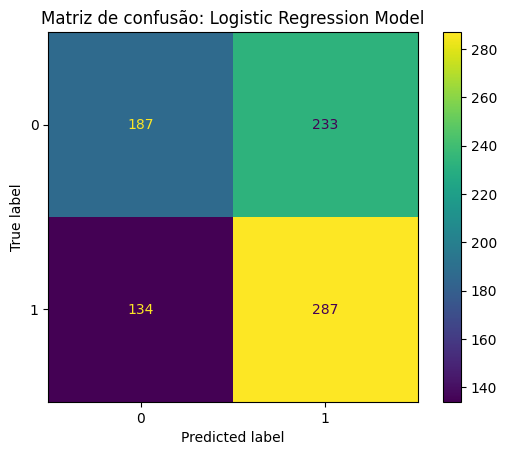

In [17]:
print(classification_report(y_test, predictions, digits=4))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de confusão: Logistic Regression Model')
plt.show()


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *O modelo de classificação construído segundo o algorítimo de Regressão Logística apresentou acurácia de 56,36%, utilizando todas as variáveis da amostra. O modelo apresentou uma precisão de 58,26% na predição de clientes que não abandonaram e 55,19% na predição de clientes que abandonaram *

## Árvore de decisão ##

In [18]:
from sklearn.tree import DecisionTreeClassifier 

In [19]:
model = DecisionTreeClassifier (criterion="gini",
                                max_depth=2, 
                                min_samples_leaf=5, 
                                random_state=123)
clf3 = model.fit(X_train, y_train)

Modelo e acurácia

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_predict = model.predict(X_test)
acc_arbol = accuracy_score(y_test,y_predict)
print(f'Acurácia do modelo usando o modelo árvore de decisão: {acc_arbol}')

Acurácia do modelo usando o modelo árvore de decisão: 0.7241379310344828


Matriz de confusão do modelo

              precision    recall  f1-score   support

           0     0.6918    0.8071    0.7451       420
           1     0.7692    0.6413    0.6995       421

    accuracy                         0.7241       841
   macro avg     0.7305    0.7242    0.7223       841
weighted avg     0.7306    0.7241    0.7222       841



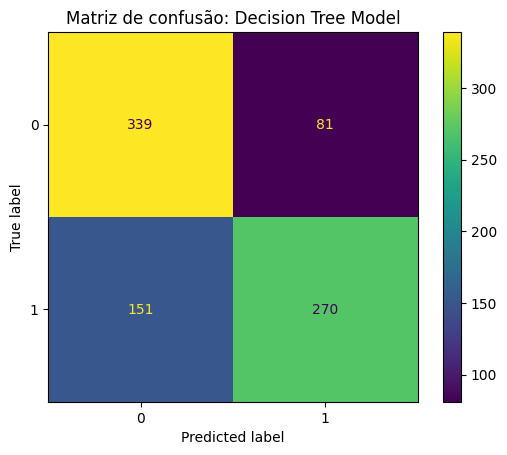

In [21]:
print(classification_report(y_test, y_predict, digits=4))

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de confusão: Decision Tree Model')
plt.show()


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *O modelo de classificação construído segundo o algorítimo de Árvore de Decisão apresentou acurácia de 72,41%, utilizando todas as variáveis da amostra. O modelo apresentou uma precisão de 69,18% na predição de clientes que não abandonaram e 76,92% na predição de clientes que abandonaram.*

## Seleção do melhor modelo

In [22]:
# dicionário com os modelos testados e a acurácia de cada um
accuracy_dict = {'Random Forest': acc_randomforest, 'Regresión Logistica': acc_logistic, 'Árvore de Decisão': acc_arbol}

# busca no dicionário o item com maior chave (maior acurácia)
max_value = max(accuracy_dict.values())  # maximum value
max_keys = ''.join([k for k, v in accuracy_dict.items() if v == max_value])

print(f'O modelo com maior poder de classificação é o modelo {max_keys} com {max_value} de acurácia')

O modelo com maior poder de classificação é o modelo Random Forest com 0.7455410225921522 de acurácia



<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Entre os diversos modelos de clasificação existentes, foram tomados trêss – [Random Forest](#scrollTo=Qi7UjP-W05ee&line=1&uniqifier=1), [Regresión Logística](#scrollTo=TgXQI9Sq7MT5&line=1&uniqifier=1) e [Árvore de Decisão](#scrollTo=zQ3gDcC4EPCv&line=1&uniqifier=1). Analisando as matrizes de decisão entre os registros históricos e as previsões de cada modelo, nota-se que os três modelos têm similar grau de eficiência na previsão dos clientes que abandonarão os serviços, porém o  modelo com maior acurácia é o Random Forest. É importante ter em mente que apenas a acurácia não significa que o modelo seja bom, uma vez que um conjunto de dados desbalanceado (ou seja, com mais ocorrências de um valor do que outro para a variável que se deseja prever) pode ter uma alta acurácia, mas baixa precisão para cada valor. Por essa razão, optou-se por balancear os dados artificialmente para fins didáticos.*

## Fazendo previsões com o modelo

In [23]:
customers3 = customers

In [24]:
customers3 = encoder.fit_transform(customers3)

In [25]:
probs = modelo_rfc.predict_proba(customers3.loc[:, ~customers3.columns.isin(['churn'])])

# Adicionar as probabilidades como uma coluna no dataframe
customers3['prob_churn'] = probs[:, 1]

In [26]:
classe = modelo_rfc.predict(customers3.loc[:, ~customers3.columns.isin(['prob_churn', 'churn'])])

In [27]:
# Adicionar as classificações como uma coluna no dataframe
customers3['classe_churn'] = classe


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Foi criada uma régua de risco, dividida em 5 faixas de risco, segundo a probabilidade de churn. Para probabilidade de risco superior  a 90%, o risco foi considerado "Muito Alto";  para probabilidade de risco entre 70% e 90%, o risco foi considerado "Alto"; para risco entre 50% e 70% o risco foi considerado "Moderado"; para risco entre 30% e 50% o risco foi considerado "Baixo"; e risco igual ou inferior a 30% foi considerado "Muito Baixo".*

In [28]:
# Definir a função lambda para atribuir o risco de churn com base na probabilidade
risk_func = lambda x: 'Muito Alto' if x >= 0.9 else 'Alto' if x >= 0.7 else 'Moderado' if x >= 0.5 else 'Baixo' if x >= 0.3 else 'Muito Baixo'

# Aplicar a função lambda na coluna prob_churn para criar a nova coluna risco_churn
customers3['risco_churn'] = customers3['prob_churn'].apply(risk_func)

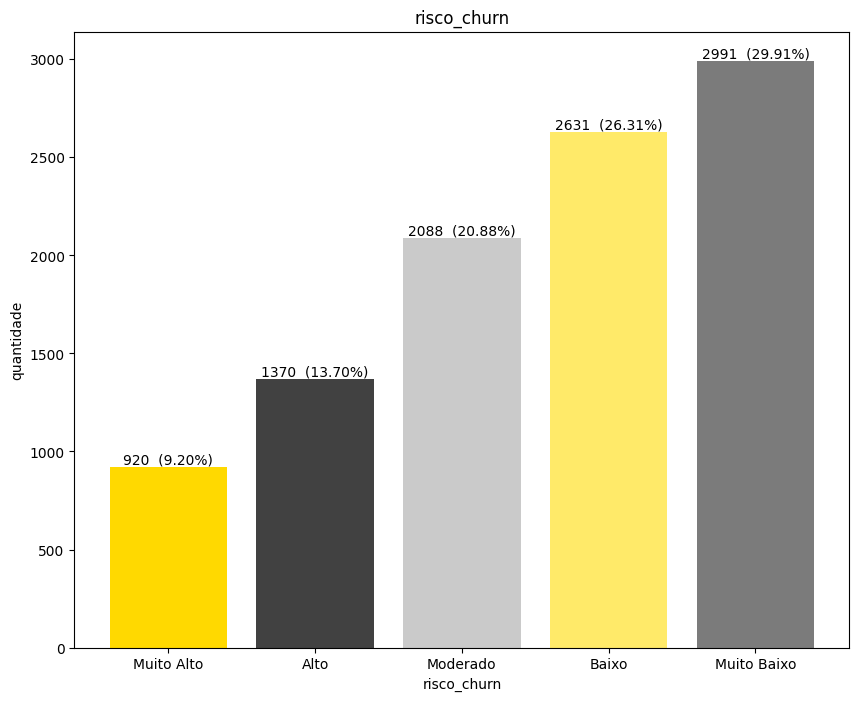

In [46]:
barplot_count(customers3, 'risco_churn', 'risco_churn')